In [1]:
#Imports:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, auc
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.models import load_model
import seaborn as sns

In [2]:
#Subir el archivo desde el pc
uploaded = files.upload()

Saving high_diamond_ranked_10min.csv to high_diamond_ranked_10min.csv


In [3]:
#Cargo el dataset
df = pd.read_csv('high_diamond_ranked_10min.csv')
df.head(5)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [4]:
#Me aseguro que no haya valores vacíos
df.isna().sum()

,0
gameId,0
blueWins,0
blueWardsPlaced,0
blueWardsDestroyed,0
blueFirstBlood,0
blueKills,0
blueDeaths,0
blueAssists,0
blueEliteMonsters,0
blueDragons,0


In [5]:
# Dividir los datos en los conjuntos de entrenamiento y test
X = df.drop('blueWins', axis=1)
y = df['blueWins']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Estandarizarlos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
#He decidido alterarlo, antes era 8.
batch_size = 32

In [7]:
#Utilizo float32 para las características
X_train_tf = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test_tf = tf.convert_to_tensor(X_test, dtype=tf.float32)
#Utilizo int32 para las etiquetas.
y_train_tf = tf.convert_to_tensor(y_train, dtype=tf.int32)
y_test_tf = tf.convert_to_tensor(y_test, dtype=tf.int32)

# Crear datasets de TensorFlow
train_tf = tf.data.Dataset.from_tensor_slices((X_train_tf, y_train_tf)).batch(batch_size).shuffle(len(X_train))
test_tf  = tf.data.Dataset.from_tensor_slices((X_test_tf, y_test_tf)).batch(batch_size)


In [8]:
input_dim = X_train.shape[1]
#Lo he modificado, antes era 0.01
learning_rate = 0.001

In [9]:
# Definir el modelo de Regresión Logística y sus capas
model_tf = models.Sequential([
  layers.Dense(120, activation="relu", input_shape=(input_dim,), kernel_initializer='he_normal'),
  layers.Dense(60, activation="relu", kernel_initializer='he_normal'),
  layers.Dense(2, activation="softmax")
])

# Compilar el modelo
model_tf.compile(optimizer=Adam(learning_rate),
              #Porque las etiquetas y_train e y_test están como enteros, y por la salida de la capa softmax
              loss= 'sparse_categorical_crossentropy',
              metrics= ['accuracy'])

# Resumen del modelo
model_tf.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 120)                 │           4,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 60)                  │           7,260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             122 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,182 (47.59 KB)

 Trainable params: 12,182 (47.59 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
#Los he modificado para hacerlo más asequible computacionalmente
epochs = 100
delta_epochs = 10

In [11]:
for epoch in range(0, epochs, delta_epochs):
    # Entrenar el modelo
    model_tf.fit(train_tf, epochs=delta_epochs, verbose=0)

    # Evaluar en los datos de entrenamiento y prueba
    train_loss_tf, train_accuracy_tf = model_tf.evaluate(train_tf, verbose=0)
    test_loss_tf, test_accuracy_tf = model_tf.evaluate(test_tf, verbose=0)

    # Imprimir resultados
    print(f"Epoch [{epoch + delta_epochs}/{epochs}], Train Loss: {train_loss_tf:.4f}, Test Loss: {test_loss_tf:.4f}, Train Accuracy: {train_accuracy_tf:.4f}, Test Accuracy: {test_accuracy_tf:.4f}")

Epoch [10/100], Train Loss: 0.4246, Test Loss: 0.5732, Train Accuracy: 0.8056, Test Accuracy: 0.7085
Epoch [20/100], Train Loss: 0.3064, Test Loss: 0.7050, Train Accuracy: 0.8738, Test Accuracy: 0.6878
Epoch [30/100], Train Loss: 0.2146, Test Loss: 0.8884, Train Accuracy: 0.9237, Test Accuracy: 0.6594
Epoch [40/100], Train Loss: 0.1428, Test Loss: 1.0797, Train Accuracy: 0.9556, Test Accuracy: 0.6746
Epoch [50/100], Train Loss: 0.0961, Test Loss: 1.3579, Train Accuracy: 0.9760, Test Accuracy: 0.6468
Epoch [60/100], Train Loss: 0.0625, Test Loss: 1.5638, Train Accuracy: 0.9847, Test Accuracy: 0.6619
Epoch [70/100], Train Loss: 0.0631, Test Loss: 1.8616, Train Accuracy: 0.9805, Test Accuracy: 0.6387
Epoch [80/100], Train Loss: 0.0521, Test Loss: 2.1130, Train Accuracy: 0.9848, Test Accuracy: 0.6407
Epoch [90/100], Train Loss: 0.0211, Test Loss: 2.2475, Train Accuracy: 0.9970, Test Accuracy: 0.6635
Epoch [100/100], Train Loss: 0.0386, Test Loss: 2.4203, Train Accuracy: 0.9886, Test Accura

In [12]:
#Almaceno en variables los resultados de las predicciones
y_pred_train_prob = model_tf.predict(X_train_tf)
y_pred_test_prob = model_tf.predict(X_test_tf)

#Convertir las probabilidades obtenidas a etiquetas binarias, y almacenarlas en variables
y_pred_train_tf = np.argmax(y_pred_train_prob, axis=1)
y_pred_test_tf = np.argmax(y_pred_test_prob, axis=1)

#Almaceno en variables las matrices de confusion con los datos de train y test
cm_train_tf = confusion_matrix(y_train_tf, y_pred_train_tf)
cm_test_tf =  confusion_matrix(y_test_tf, y_pred_test_tf)

# Classification Report
print("Entrenamiento (clasificación): ",classification_report(y_train_tf, y_pred_train_tf))
print("Test (clasificación): ", classification_report(y_test_tf, y_pred_test_tf))

# Matriz de confusión
print("Entrenamiento (Matrix): ", cm_train_tf)
print("Test (Matrix): ", cm_test_tf)


247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Entrenamiento (clasificación):                precision    recall  f1-score   support

           0       0.99      0.98      0.99      3966
           1       0.98      0.99      0.99      3937

    accuracy                           0.99      7903
   macro avg       0.99      0.99      0.99      7903
weighted avg       0.99      0.99      0.99      7903

Test (clasificación):                precision    recall  f1-score   support

           0       0.67      0.65      0.66       983
           1       0.66      0.68      0.67       993

    accuracy                           0.67      1976
   macro avg       0.67      0.67      0.67      1976
weighted avg       0.67      0.67      0.67      1976

Entrenamiento (Matrix):  [[3905   61]
 [  29 3908]]
Test (Matrix):  [[642 341]
 [319 674]]


TP (Verdaderos Ganadores):	674
FN (Falsos Perdedores):		319
FP (Falsos Ganadores):		341
TN (Verdaderos Perdedores):	642


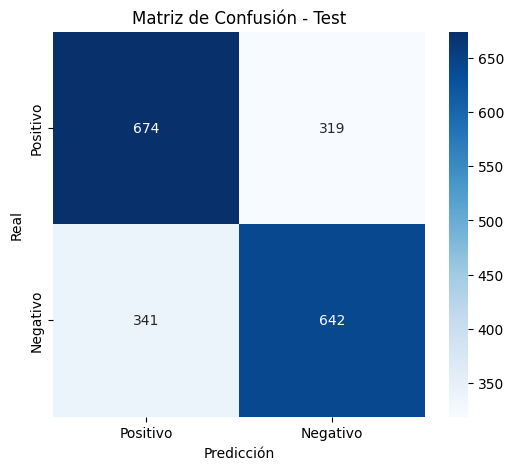

In [13]:
# Mostrar gráficamente la matriz de confusión  (TENSORFLOW) Es la referente a test.
print(f"TP (Verdaderos Ganadores):\t{cm_test_tf[1, 1]}")
print(f"FN (Falsos Perdedores):\t\t{cm_test_tf[1, 0]}")
print(f"FP (Falsos Ganadores):\t\t{cm_test_tf[0, 1]}")
print(f"TN (Verdaderos Perdedores):\t{cm_test_tf[0, 0]}")

cm_MatrizCorrecta = [[cm_test_tf[1, 1], cm_test_tf[1, 0]],
                    [cm_test_tf[0, 1], cm_test_tf[0, 0]]]


plt.figure(figsize=(6,5))
sns.heatmap(cm_MatrizCorrecta, annot=True, fmt="d", cmap="Blues", xticklabels=['Positivo', 'Negativo'], yticklabels=['Positivo', 'Negativo'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title("Matriz de Confusión - Test")
plt.show()

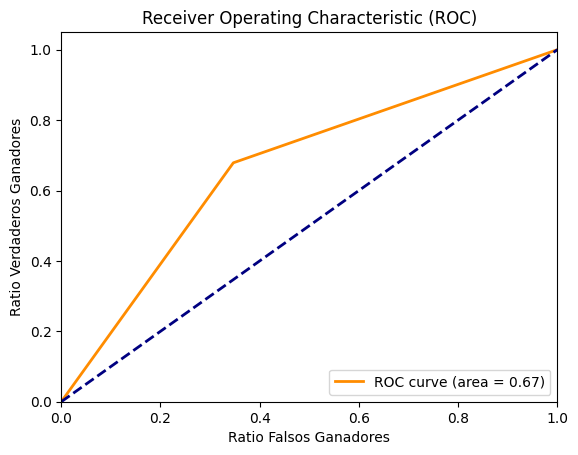

In [14]:
# Plot ROC Curve for TENSORFLOW results
fpr, tpr, thresholds = roc_curve(y_test_tf, y_pred_test_tf)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ratio Falsos Ganadores')
plt.ylabel('Ratio Verdaderos Ganadores')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [15]:
def calculate_fpr_tpr_tf(y_true, y_pred_probs, threshold):
    """
    Calcula las tasas de falsos positivos (FPR) y verdaderos positivos (TPR)
    en función de un umbral dado.

    Parámetros:
    - y_true: np.array, etiquetas reales (0 = negativo, 1 = positivo).
    - y_pred_probs: np.array, probabilidades de predicción del modelo.
    - threshold: float, umbral de decisión para clasificar como 0 o 1.

    Retorna:
    - fpr: float, tasa de falsos positivos.
    - tpr: float, tasa de verdaders positivos.
    """

    # Convertir probabilidades en predicciones binarias usando el umbral
    y_pred = (y_pred_probs >= threshold)

    # Calcular TP, FP, TN, FN
    TP = np.sum(np.logical_and(y_pred == 1, y_true == 1))
    FP = np.sum(np.logical_and(y_pred == 1, y_true == 0))
    TN = np.sum(np.logical_and(y_pred == 0, y_true == 0))
    FN = np.sum(np.logical_and(y_pred == 0, y_true == 1))

    # Calcular FPR y FNR evitando divisiones por cero
    fpr = np.divide(FP, (FP + TN), where=(FP + TN) != 0, dtype=float)
    fnr = np.divide(FN, (FN + TP), where=(FN + TP) != 0, dtype=float)
    tpr = 1 - fnr

    return fpr, tpr

In [16]:
# ROC points for TENSORFLOW model -------------------------
y_pred_test_probs_tf = model_tf.predict(X_test_tf)[:, 1]

fpr, tpr = calculate_fpr_tpr_tf(y_test_tf, y_pred_test_probs_tf, threshold = 0.3)
print("TENSORFLOW \n---------")
print(f"Para umbral = 0.3:")
print(f"Tasa de Falsos Ganadores     (FPR): {fpr:.2f}")
print(f"Tasa de Verdaderos Ganadores (TPR): {tpr:.2f} \n")

fpr, tpr = calculate_fpr_tpr_tf(y_test_tf, y_pred_test_probs_tf, threshold = 0.5)
print(f"Para umbral = 0.5:")
print(f"Tasa de Falsos Ganadores     (FPR): {fpr:.2f}")
print(f"Tasa de Verdaderos Ganadores (TPR): {tpr:.2f} \n")

fpr, tpr = calculate_fpr_tpr_tf(y_test_tf, y_pred_test_probs_tf, threshold = 0.8)
print(f"Para umbral = 0.8:")
print(f"Tasa de Falsos Ganadores     (FPR): {fpr:.2f}")
print(f"Tasa de Verdaderos Ganadores (TPR): {tpr:.2f} \n")

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
TENSORFLOW 
---------
Para umbral = 0.3:
Tasa de Falsos Ganadores     (FPR): 0.38
Tasa de Verdaderos Ganadores (TPR): 0.71 

Para umbral = 0.5:
Tasa de Falsos Ganadores     (FPR): 0.35
Tasa de Verdaderos Ganadores (TPR): 0.68 

Para umbral = 0.8:
Tasa de Falsos Ganadores     (FPR): 0.29
Tasa de Verdaderos Ganadores (TPR): 0.62 



In [ ]:
#Guardar el modelo
model_tf.save('RRNN_LOL.h5')

#Cargar el modelo
new_model_tf = load_model('RRNN_LOL.h5')

#Obtener las probabilidades predichas
y_pred_test_prob_new_tf = new_model_tf.predict(X_test_tf) > 0.5

#Convertir las probabilidades obtenidas a etiquetas binarias
y_pred_test_new_tf = np.argmax(y_pred_test_prob_new_tf, axis=1)

#Calcular la precisión en el conjunto de prueba
test_accuracy_new_tf = np.mean(y_pred_test_new_tf == y_test_tf)

print(f"Test Accuracy of the Loaded Model: {test_accuracy_new_tf:.4f}")

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Test Accuracy of the Loaded Model: 0.0000
